# Rozpoznawanie końcowej oceny studenta przy pomocy klasyfikacji

Projekt realizowany w ramach laboratorium z _Podstaw Reprezentacji i Analizy Danych_ prowadzonych przez dr inż. Grzegorza Sarwas.

## Opis postawionego problemu

Dane, które wykorzystujemy do realizacji projektu zostały utworzone w oparciu o ankiety, które wykonali uczniowie przedmiotów matematyka oraz język portugalski z różnych gimnazjów. Dane zawierają podstawowe informacje o uczniach jak ich płeć, wiek, adres zamieszkania, jak i te bardziej szczegółowe jak zawody rodziców czy osoba w rodzinie pilnująca, czy wybrany uczeń poświęca odpowiednio dużo czasu na naukę. 
Zadanie, które zostało nam postawione to z pomocą tych danych spróbować przewidzieć oceny końcowe osób za pomocą poznanych przez nas technik analizy danych.

## Określenie parametrów danych
Wyznaczenie liczby obiektów, liczby klas, zakress zmienności poszczególnych atrybutów, ich
wartości statystycznych, poziom wypełnienia kolumn, ilość unikalnych danych itp. 

Każda z kolumn zawiera jasno określone informacje o osobach, które brały udział w ankiecie. Kolumny te zawierają następujące informacje:
* **school** - szkoła, do której uczeń uczęszcza (binarnie: 'GP' - Gabriel Pereira lub 'MS' - Mousinho de Silveira).
* **sex** - płeć ucznia (binarnie: 'F' - kobieta lub 'M' - mężczyzna).
* **address** - typ miejsca zamieszkania ucznia (binarnie: 'U' - miejski lub 'R' - wiejski).
* **famsize** - liczba członków rodziny (binarnie: 'LE3' - mniej lub równo 3 lub 'GT3' - więcej niż 3).
* **Pstatus** - stan współżycia rodziców (binarnie: 'T' - rodzice żyją razem lub 'A' - oddzielnie).
* **Medu** - poziom edukacji matki (numerycznie: 0 - żaden, 1 - podstawowe wykształcenie (4-ta klasa), 2 - od 5-tej do 9-tej klasy, 3 - wykształcenie na poziomie gimnazjum lub 4 - wykształcenie wyższe niż wszystkie poprzednie). 
* **Fedu** - poziom edukacji ojca (numerycznie: 0 - żaden, 1 - podstawowe wykształcenie (4-ta klasa), 2 - od 5-tej do 9-tej klasy, 3 - wykształcenie na poziomie gimnazjum lub 4 - wykształcenie wyższe niż wszystkie poprzednie).
* **Mjob** - praca matki (symbolicznie: 'teacher' - nauczyciel, 'health' - związane z dbaniem o zdrowie, 'services' - służba cywilna (np. administracyjna lub polityczna), 'at_home' - zajmowanie się domem lub 'other' - inna).
* **Fjob** - praca ojca (symbolicznie: 'teacher' - nauczyciel, 'health' - związane z dbaniem o zdrowie, 'services' - służba cywilna (np. administracyjna lub polityczna), 'at_home' - zajmowanie się domem lub 'other' - inna).
* **reason** - powód wybrania danej szkoły (symbolicznie: 'home' - mieszkanie blisko szkoły, 'reputation' - dobra reputacja szkoły, 'course' - preferencje przedmiotowe lub 'other' - inny).
* **guardian** - osoba pilnująca czasu poświęconego na naukę przez ucznia (symobolicznie: 'mother' - matka, 'father' - ojciec, 'other' - inna).
* **traveltime** - czas podróży z domu do szkoły (numerycznie: 1 - poniżej 2 godzin, 2 - od 2 do 5 godzin, 3 - od 5 do 10 godzin lub 4 - powyżej 10 godzin).
* **studytime** - czas w tygodniu poświęcony na naukę (numerycznie: 1 - poniżej 2 godzin, 2 - od 2 do 5 godzin, 3 - od 5 do 10 godzin lub 4 - powyżej 10 godzin).
* **failures** - liczba oblanych w przeszłości klas (numerycznie: n, jeśli 1<=n<3, w przeciwnym wypadku 4).
* **schoolsup** - dodatkowe wsparcie edukacyjne (binarnie: 'yes' - tak, 'no' - nie).
* **famsup** - wsparcie edukacyjne rodziny (binarnie: 'yes' - tak, 'no' - nie).
* **paid** - dodatkowo płatne zajęcia w ramach wybranego przedmiotu (binarnie: 'yes' - tak, 'no' - nie).
* **activities** - zajęcia dodatkowe (binarnie: 'yes' - tak, 'no' - nie).
* **nursery** - czy dany uczeń uczęszczał do przedszkola (binarnie: 'yes' - tak, 'no' - nie).
* **higher** - czy dany uczeń chce uzyskać wykształcenie wyższe (binarnie: 'yes' - tak, 'no' - nie).
* **internet** - dostęp do internetu w domu (binarnie: 'yes' - tak, 'no' - nie).
* **romantic** - w związku uczuciowym z drugą osobą (binarnie: 'yes' - tak, 'no' - nie).
* **famrel** - kontakty z rodziną (numerycznie: od 1 - bardzo złe do 5 - bardzo dobre).
* **freetime** - czas wolny po zajęciach w szkole (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **goout** - ilość wyjść ze znajomymi (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **Dalc** - ilość wypitego alkoholu w dni powszednie (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **Walc** - ilość wypitego alkoholu w weekendy (numerycznie: od 1 - bardzo mało do 5 - bardzo dużo).
* **health** - stan zdrowia ucznia (numerycznie: od 1 - bardzo słaby do 5 - bardzo dobry).
*  **absences** - ilość nieobecności w szkole (numerycznie: od 0 do 93).

### Przygotowanie środowiska

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

### Wczytanie danych i przygotowanie do analizy
Wszystkie dane mają określone wartości. Nie trzeba więc usuwać żadnych obiektów.

In [2]:
df = pd.read_csv("student-por.csv")

liczbaBarkow = df.isnull().sum().sum()
print(f"Liczba brakujących danych: {liczbaBarkow}\n")

Liczba brakujących danych: 0



### Podstawowe parametry danych

Pokazanie podstawowych informacji o otrzymanych danych.

In [3]:
print(f"Liczba obiektów wynosi {df.shape[0]}.\n")

print(f"Każdy obiekt opisują {df.columns.size} atrybuty.")
print("3 ostatnie atrybuty to oceny, które należy wyznaczyć.")
print(f"Pozostaje więc {df.columns.size - 3} atrybutów do analizy.")

Liczba obiektów wynosi 649.

Każdy obiekt opisują 33 atrybuty.
3 ostatnie atrybuty to oceny, które należy wyznaczyć.
Pozostaje więc 30 atrybutów do analizy.


In [4]:
podstawoweAtrybuty = df.columns[1:-2]
podstawoweAtrybuty.size

30

### Usunięcie potencjalnych barków w danych

Wyszukanie braków w danych.

In [5]:
df.isnull().sum().sum()

0

Nie ma brakujących danych, więc nie trzeba usuwać żadnych wierszy ani kolumn.

### Wyznaczenie zakresów zmienności poszczególnych atrybutów

Spróbujemy wyznaczyć zakresy zmiennności i inne dane opisujące atrybuty.

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


**Nie wszystkie atrybuty** są uwzględnione.  
Wyznaczymy, których kolumn brakuje.

In [7]:
poprawneKolumny = df.describe().columns

brakujaceKolumny = np.setdiff1d(df.columns, poprawneKolumny)

print("Lista brakujących kolumn")
brakujaceKolumny

Lista brakujących kolumn


array(['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize',
       'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid',
       'reason', 'romantic', 'school', 'schoolsup', 'sex'], dtype=object)

Możliwe, że brakujące kolumny mają inny typ danych, które się w nich znajdują.
Przeanalizujmy typy wczytanych danych.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

Okazuje się, że brakujące dane są typu `object`. Sprawdzimy, czy zmiana na typ kategoryczny poprawi rezultaty.

In [9]:
for k in brakujaceKolumny:
    df[k] = df[k].astype('category')
    
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


Ciągle nie ma kategorycznych kolumn. By to zmienić należy przypisać im **wartości liczbowe**.  
Dla każdego atrybutu trzeba wprowadzić mapowanie na wartości liczbowe.
Bez tego dalsza analiza tych atrybutów nie będzie możliwa.

In [10]:
schoolMap = {"GP": 0, "MS": 1}
df.school = df.school.map(schoolMap)

sexMap = {"F": 0, "M": 1}
df.sex = df.sex.map(sexMap)

addressMap = {"R": 0, "U": 1}
df.address = df.address.map(addressMap)

familySizeMap = {"LE3": 0, "GT3": 1}
df.famsize = df.famsize.map(familySizeMap)

parrentStatusMap = {"A": 0, "T": 1}
df.Pstatus = df.Pstatus.map(parrentStatusMap)

# Pracy rodziców nie da się tak łatwo zmapować
# Powodu wybrania szkoły nie da się tak łatwo zmapować
# Nie wiem o co chodzi z guardian

extraEducationalSupportMap = {"no": 0, "yes": 1}
df.schoolsup = df.schoolsup.map(extraEducationalSupportMap)

familyEducationalSupportMap = {"no": 0, "yes": 1}
df.famsup = df.famsup.map(familyEducationalSupportMap)

extraPaidClassesMap = {"no": 0, "yes": 1}
df.paid = df.paid.map(extraPaidClassesMap)

extraCurricularActivitiesMap = {"no": 0, "yes": 1}
df.activities = df.activities.map(extraCurricularActivitiesMap)

nurserryAtendanceMap = {"no": 0, "yes": 1}
df.nursery = df.nursery.map(nurserryAtendanceMap)

wantsToTakeHigherEducationMap = {"no": 0, "yes": 1}
df.higher = df.higher.map(wantsToTakeHigherEducationMap)

internetAccesMap = {"no": 0, "yes": 1}
df.internet = df.internet.map(internetAccesMap)

inRelationsheapMap = {"no": 0, "yes": 1}
df.romantic = df.romantic.map(inRelationsheapMap)

Teraz atrybuty kategoryczne również występują w liczbowym opisie wartości.  
Większość parametrów nie opisuje dobrze danych kategorycznych, niektóre informacje da się jednak pozyskać dzięki takiemu rozkładowi.

In [11]:
display(df.describe().iloc[:, 0:14])
display(df.describe().iloc[:, 14:])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.35,0.41,16.74,0.70,0.70,0.88,2.51,2.31,1.57,1.93,0.22,0.10,0.61,0.06
std,0.48,0.49,1.22,0.46,0.46,0.33,1.13,1.10,0.75,0.83,0.59,0.31,0.49,0.24
min,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,16.00,0.00,0.00,1.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,17.00,1.00,1.00,1.00,2.00,2.00,1.00,2.00,0.00,0.00,1.00,0.00
75%,1.00,1.00,18.00,1.00,1.00,1.00,4.00,3.00,2.00,2.00,0.00,0.00,1.00,0.00
max,1.00,1.00,22.00,1.00,1.00,1.00,4.00,4.00,4.00,4.00,3.00,1.00,1.00,1.00


,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.49,0.80,0.89,0.77,0.37,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,0.50,0.40,0.31,0.42,0.48,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,0.00,1.00,1.00,1.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,1.00,1.00,1.00,1.00,1.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


Zbadamy poszczególne atrybuty poprzez wyświetlenie histogramu dla każdego z nich.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20dd3320>,
      dtype=object)

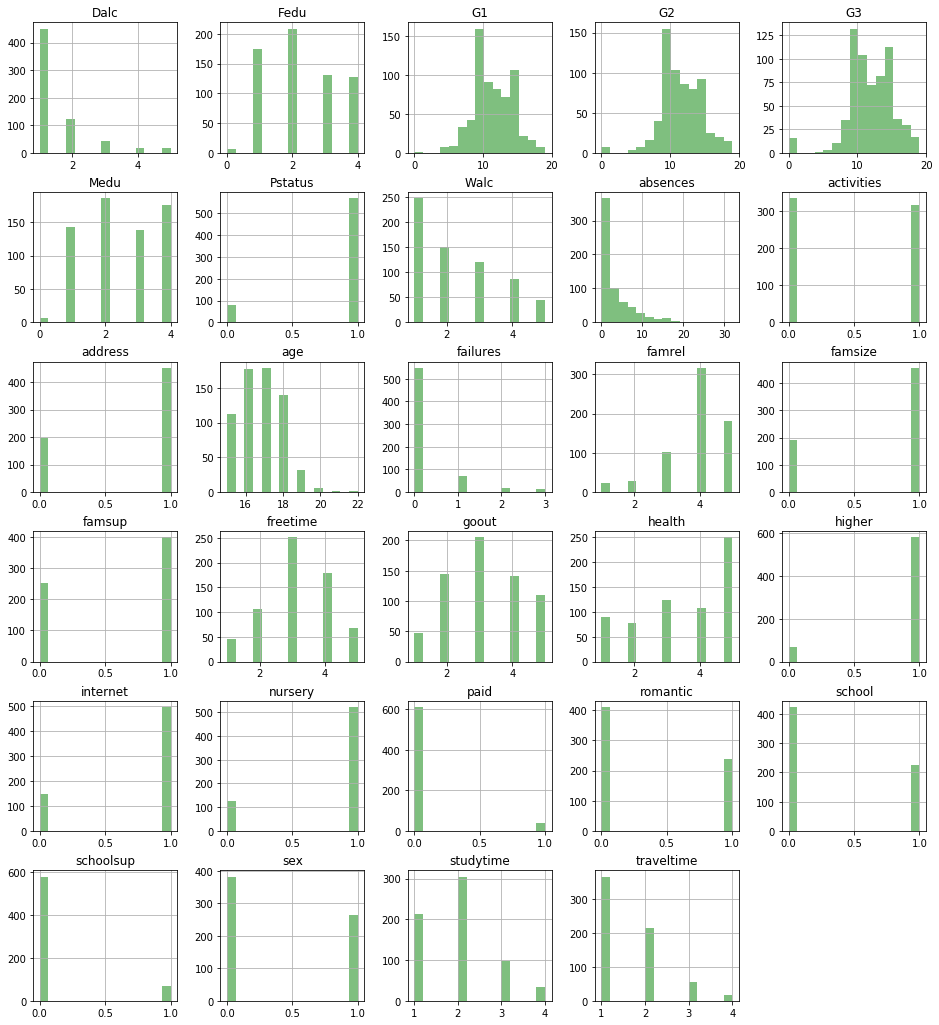

In [12]:
df.hist(color='g', alpha=0.5, bins=15, figsize = (16,18))

Jak widać histogramy atrybutów, które musieliśmy przekształcić na wartości liczbowe opierają się na binarnym podziale. Bez odpowiedniej legendy z większości histogramów trudno odczytać informacje na temat danego atrybutu. <br> Na podstawie utworzonych histogramów jesteśmy w stanie potwierdzić poniżej wyniesione wnioski z analizy atrybutów.

### Wnioski z analizy atrybutów

* Większość uczniów jest ze szkoły _Gabriel Pereira_
* Większość uczniów stanowią kobiety
* Wiek uczniów jest w okolicy 17 lat z odchyleniem standartowym około 1 roku

* Większość uczniów pochodzi z dużych rodzin
* Większość uczniów pochodzi z rodzin gdzie rodzice żyją razem
* Bardzo mała część uczniów uczęszcza na korepetycje
* Większości uczniów czas podróży z domu do szkoły wynosi mniej niż 2 godziny
* Większośći uczniów czas poświęcony na naukę wynosi od 2 do 5 godzin
* Około połowa ankietowanych uczniów uczęszcza na zajęcia dodatkowe pozaszkolne
* Znaczna większość uczniów uczęszczała w przeszłości do przedszkola
* Znaczna większość uczniów zamierza uzyskać wyższe wykształcenie
* Większość uczniów ma dostęp do internetu w domu
* Uczniowie mają przeważnie dobre stosunki z rodziną
* Uczniowie piją częściej w weekendy niż w dni powszednie
* Większość uczniów nie jest w związku z drugą osobą


Co ciekawe żaden uczeń nie otrzymał maksymalnej liczby punktów - 20.

## Analiza korelacji między zmiennymi

Korelacja poszczególnych atrybutów.

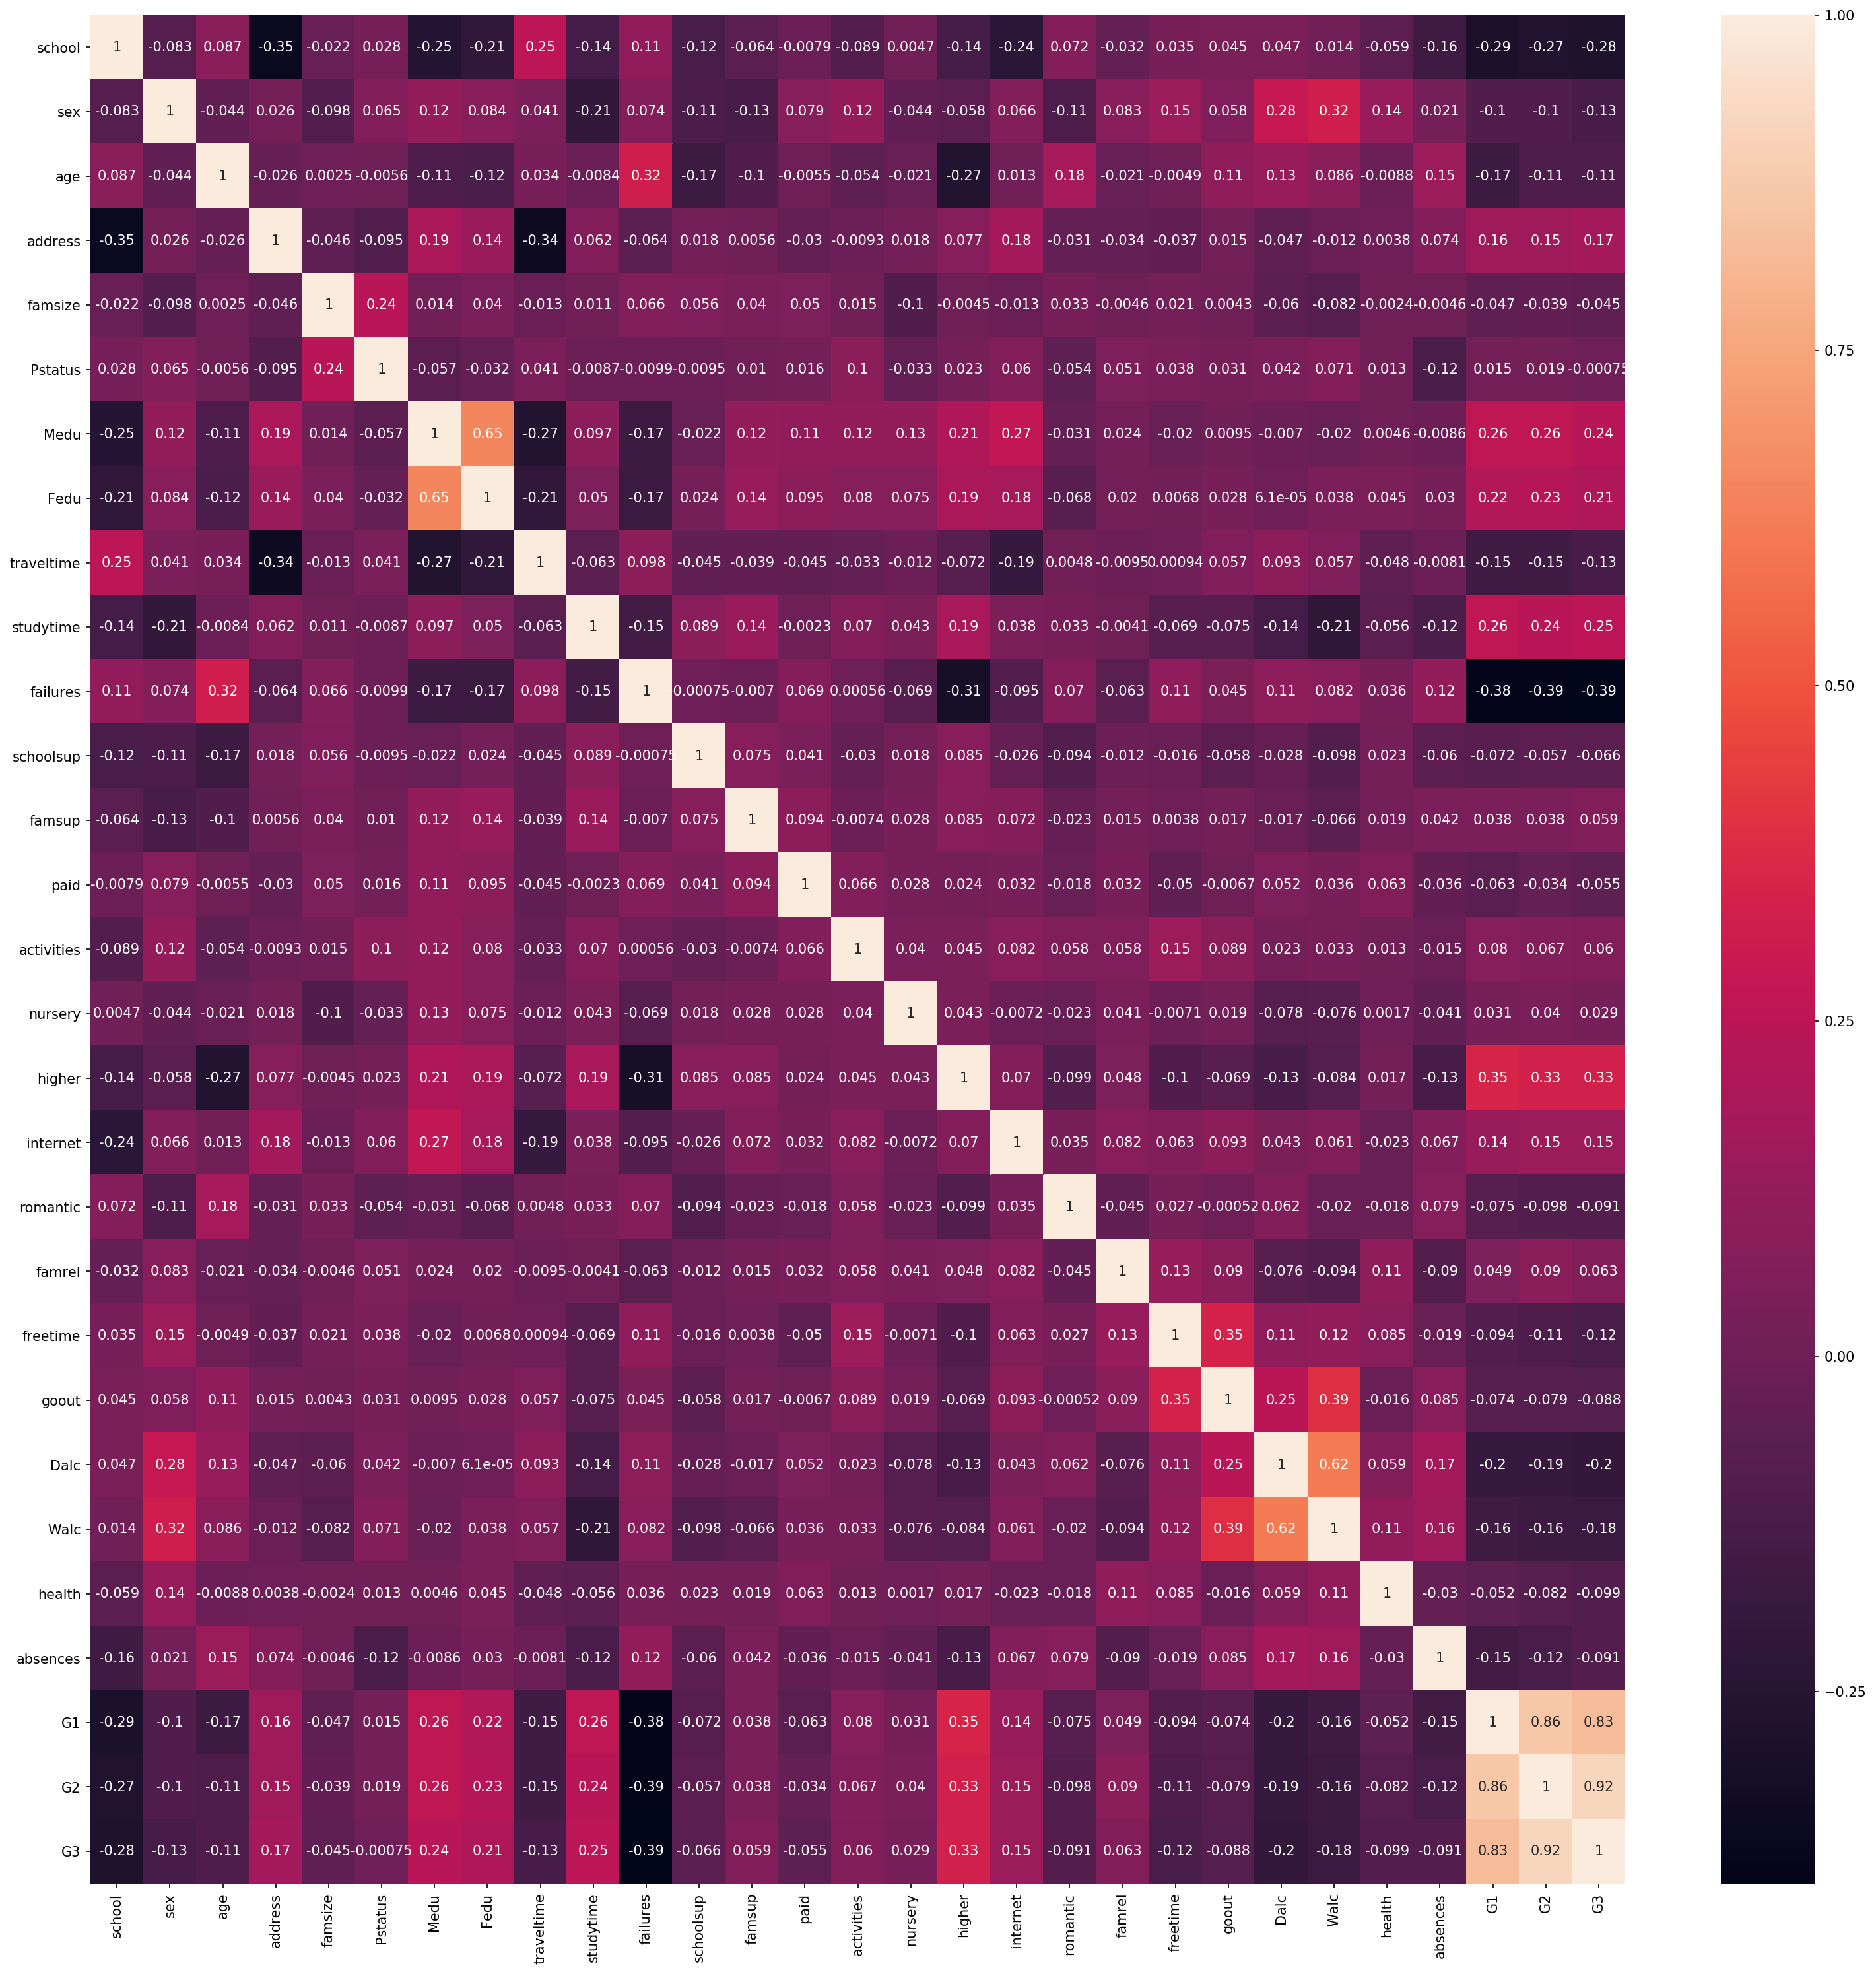

In [13]:
plt.figure(figsize=(25, 25), dpi = 150)
sns.heatmap(df.corr(), annot = df.corr())

Koralacja atybutów z ocenami

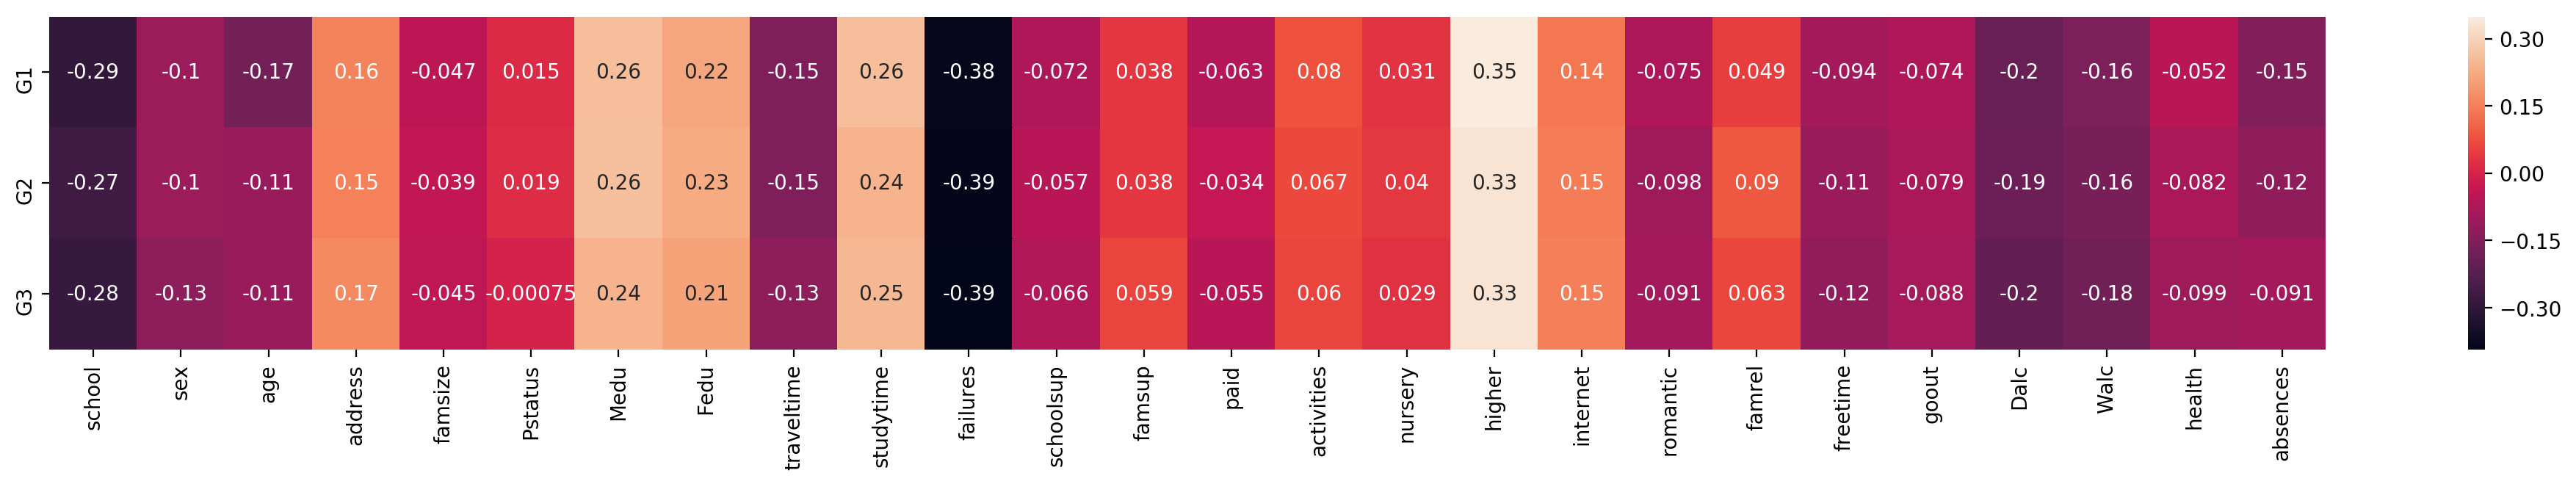

In [14]:
kolrelacjeOcen = df.corr().iloc[-3:, :-3]

plt.figure(figsize=(25, 3), dpi = 200)
sns.heatmap(kolrelacjeOcen, annot = kolrelacjeOcen)

Uporządkowanie atrybutów pod kątem ich wpływu na oceny.

In [15]:
corelacjeAtrybutow = kolrelacjeOcen.mean()

posortowaneAtrybuty = corelacjeAtrybutow.abs().sort_values(ascending=False)
posortowaneAtrybuty = pd.DataFrame(posortowaneAtrybuty, columns=["Korelacja z ocenami"])
posortowaneAtrybuty.index.name = "Atrybut"

posortowaneAtrybuty.head(10)

,Korelacja z ocenami
Atrybut,
failures,0.39
higher,0.34
school,0.28
Medu,0.25
studytime,0.25
Fedu,0.22
Dalc,0.20
Walc,0.17
address,0.16


Jak możemy zauważyć największy wpływ na oceny ma liczba oblanych w przeszłości klas. Następnym z kolei atrybutem znaczącym jest zamiar uzyskania wyższego wykształcenia przez uczniów. Te dwa atrybuty w największym stopniu wpływają na oceny, ponieważ bardzo często uczniowie, którzy oblewają klasy mają stosunek olewczy do ocen, natomiast uczniowie, którzy zamierzają kontynuować kształcenie - wręcz przeciwnie. <br>
Następny atrybut to szkoła, do której uczeń uczęszcza, oraz czas poświęcony na naukę. Przewidzieliśmy, że te atrybuty będą wpływały w znacznym stopniu na ocenę, ponieważ są z nią ściśle powiązane. <br>
Ciekawym jest wpływ wyższego wykształcenia matki oraz ojca. Można z niego wywnioskować, że wykształceni rodzice znacznie bardziej zwracają uwagę na dobre stopnie swojego dziecka.

### Zbadanie korelacji między atrybutami znaczącymi

Wyznaczenie korelacji między atrybutami skorelowanymi z oceną pozwoli odrzucić mocno skorelowane atrybuty przy budowie modelu, ponieważ reprezentują podobną cechę.

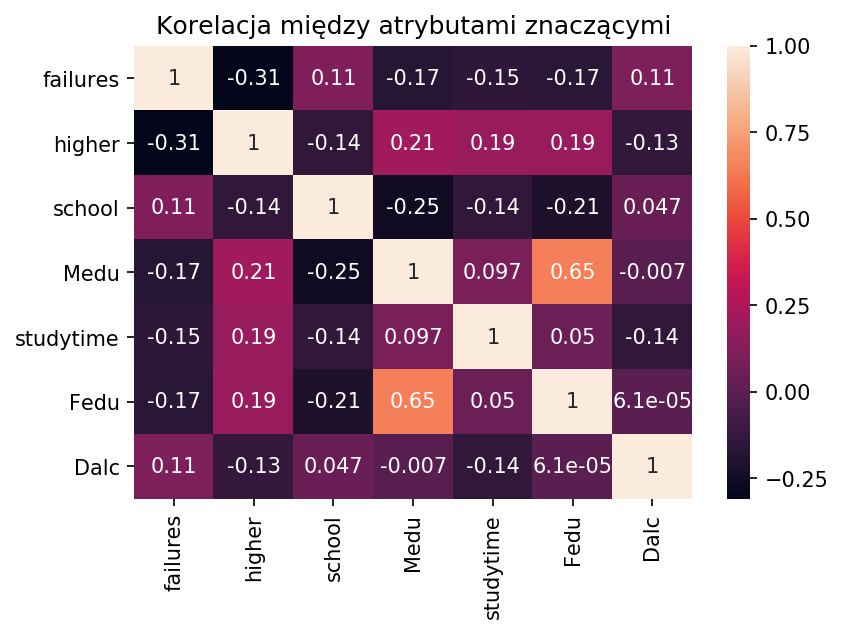

In [16]:
atrybutyZnaczace = list(list(posortowaneAtrybuty.index[:7]))

plt.figure(dpi=150)
plt.title("Korelacja między atrybutami znaczącymi")
sns.heatmap(df[atrybutyZnaczace].corr(), annot=df[atrybutyZnaczace].corr())

Jedyna wyraźna korelacja między atrybutami znaczącymi jest pomiędzy edukacją matki i ojca.

Co ciekawe **czas nauki** nie jest skorelowany z innymi parametrami. Zaprzecza to hipotezie, że to czas nauki jest głównym czynnikiem wpływającym na ocenę. <br>

Należy również wspomnieć, że chęć pójścia na studia oraz liczba oblanych przedmiotów jest ze sobą odwrotnie skorelowana, co oznacza, że w przeciwieństwie do korelacji tutaj jeden parametr przeczy drugiemu.

## Wybór parametrów znaczących

Z fragmentu macierzy korelacji przedstawionego powyżej wynika, że największy wpływ na oceny mają:
* Ilość oblanych przedmiotów
* Chęć pójścia na studia
* Szkoła, do której uczeń chodzi
* Edukacja matki
* Czas poświęcony na naukę
* Edukacja ojca
* Ilość sporzywanego alkocholu w dni robocze

Natomiast następujące parametry mają znikomy wpływ na oceny:
* Relacje rodzinne
* Stan zdrowia
* Częstotliwość wyjść ze znajomymi

## Analiza potencjalnych grupowań

**Bardzo długi czas wykonania**

In [17]:
dfObciety = df[atrybutyZnaczace + [df.columns[-1]]]

/Users/Krzysiek/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Krzysiek/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Krzysiek/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Krzysiek/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/Krzysiek/anaconda3/lib/python3.7/si

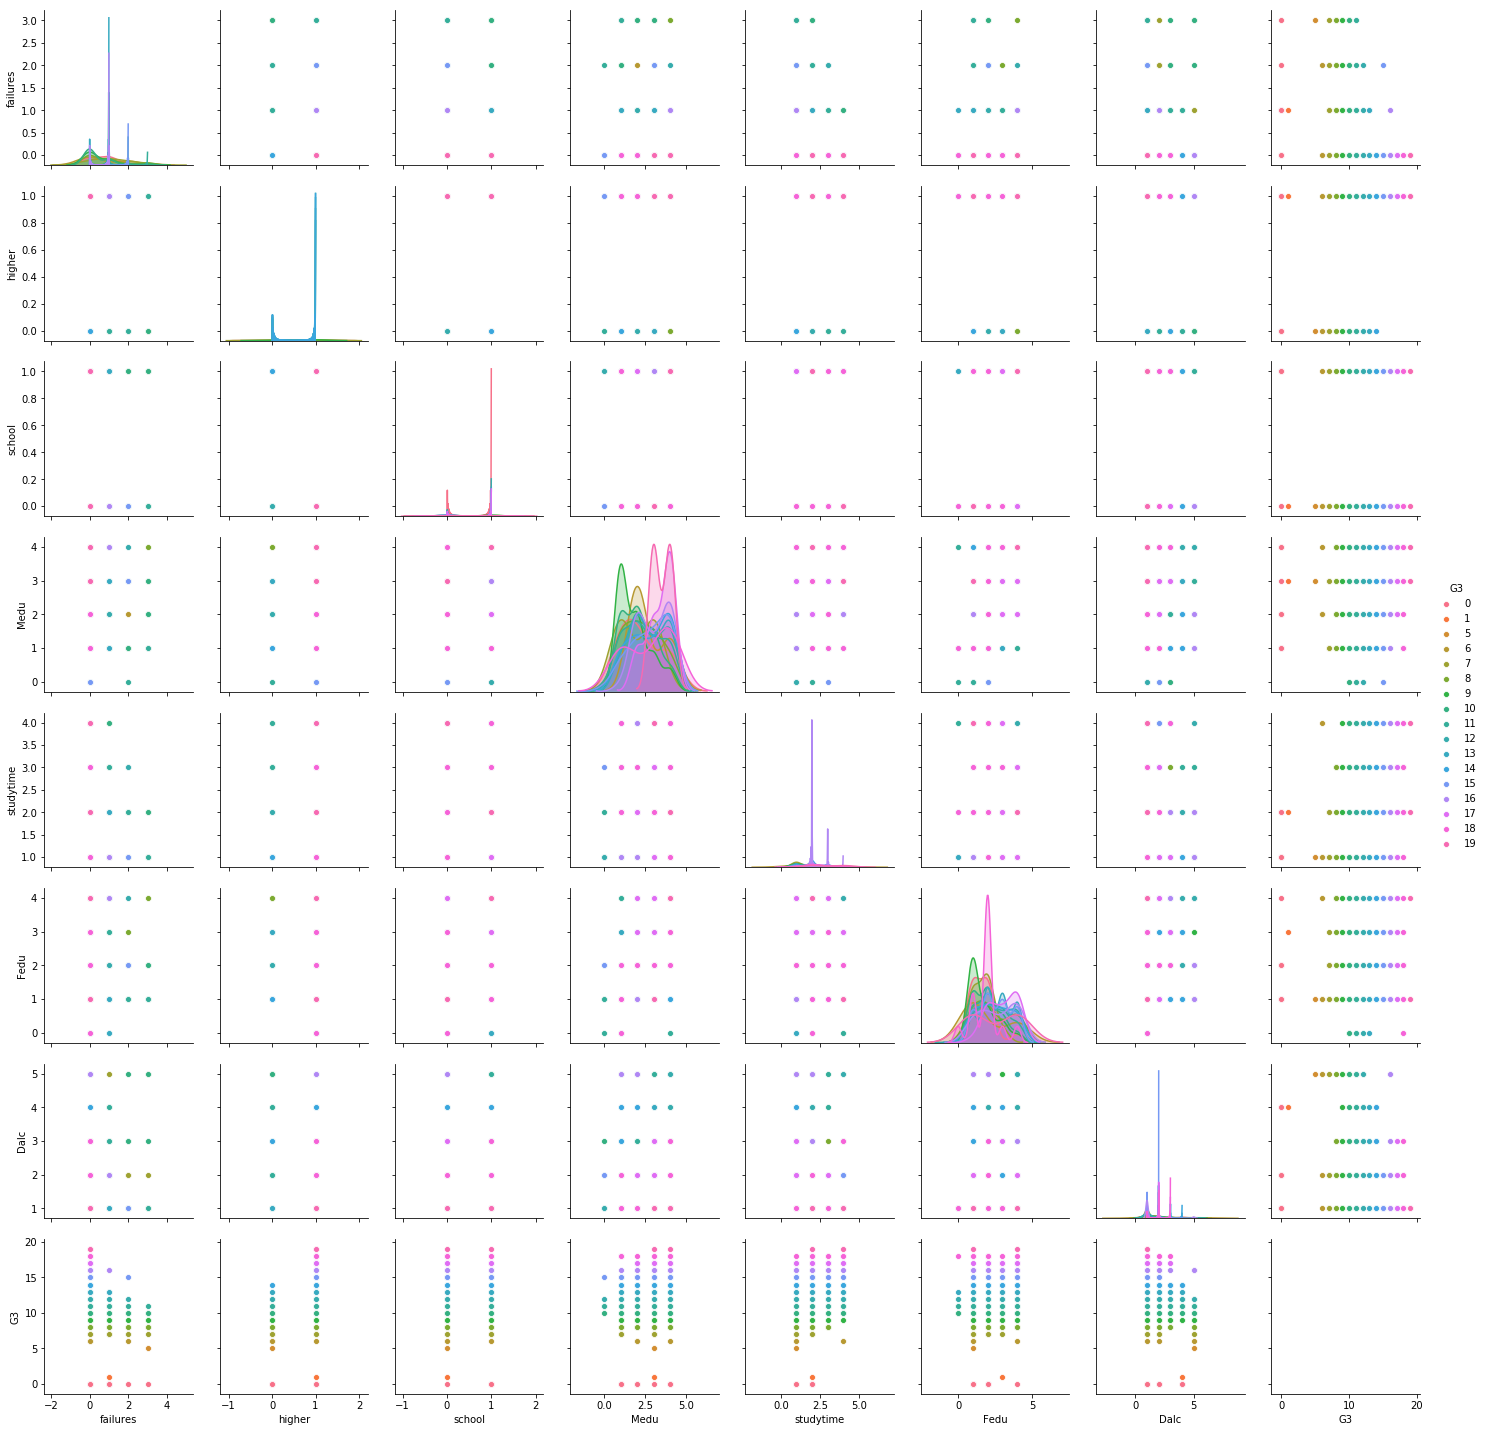

In [18]:
dfObciety = df[atrybutyZnaczace + [df.columns[-1]]]

sns.pairplot(dfObciety, kind="scatter", hue=dfObciety.columns[-1])

## Testy wybranych klasyfikatorów

Utworzenie przydatnych funkcji.

In [19]:
def podziel(df, proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def wyswietlMacierzePomylek(dane, wynikiUczacego, wynikiTestoweg):
    print("Macierz pomyłek dla zbioru uczącego")
    display(pd.crosstab(dane["dec_ucz"], wynikiUczacego)) 
    print("Macierz pomyłek dla zbioru testowego")
    display(pd.crosstab(dane["dec_test"], wynikiTestoweg)) 
    
def policzRoznice(wartosciPrawdziwe, wartosciPrzewidziane):
    #Liczy różnicę dla pojedyńczego zestawu danych
    roznice = pd.DataFrame({"Wartość prawdziwa": wartosciPrawdziwe, "Wartość przewidziana": wartosciPrzewidziane})
    roznice["Różnica"] = np.abs(roznice.iloc[:, 0] - roznice.iloc[:, 1])
    return roznice
    
def wyswietlRozniceOdPrawdziwejWartosci(dane, wynikiUczacego, wynikiTestoweg, nazwaKlasyfikatora ,tabelaWynikow):
    # Wyświetla różnicę dla danych testowych i uczących
    with pd.option_context("display.max_rows", 20):
        print("Różnice dla zbioru uczącego")
        roznice = policzRoznice(dane["dec_ucz"].values, wynikiUczacego)
        display(roznice)
        roznica = roznice["Różnica"]
        display(roznica.describe())
        tabelaWynikow.loc[(nazwaKlasyfikatora, "Uczący"), :] = (roznica.mean(), roznica.std())

        print("Różnice dla zbioru testowego")
        roznice = policzRoznice(dane["dec_test"].values, wynikiTestoweg)
        display(roznice)
        roznica = roznice["Różnica"]
        display(roznica.describe())
        tabelaWynikow.loc[(nazwaKlasyfikatora, "Testowy"), :] = (roznica.mean(), roznica.std())

def weryfikuj(model, dane, atryb, nazwaKlasyfikatora, tabelaWynikow):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].loc[:, atryb], dane["dec_ucz"])
    
    wynik_ucz = model.predict(dane["opis_ucz"].loc[:, atryb])
    wynik_test = model.predict(dane["opis_test"].loc[:, atryb])
    
    wyswietlMacierzePomylek(dane, wynik_ucz, wynik_test)
    wyswietlRozniceOdPrawdziwejWartosci(dane, wynik_ucz, wynik_test, nazwaKlasyfikatora, tabelaWynikow)

### Podział zbioru danych

W celu werifikacji poprawności klasyfikacji podzieliliśmy zbór danych na zbiór uczący i testowy w proporcji 80/20.

In [20]:
dane = podziel(dfObciety, 0.2)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  519
Liczba obiektów zbioru testowego:  130


Utworzyliśmy tabelę do porównywania wyników klasyfikatorów.  
W celu weryfikacji poprawności klasyfikacji postanowiliśmy zastosować metrykę **bezwzględnej różnicy** między wartością znaną, a otrzymaną w procesie klasyfikacji. Dla każdego klasyfikatora liczymy średnią wartość i odchylenie standardowe tej różnicy.

In [23]:
porownanieKlasyfikatorow = pd.DataFrame(columns=["Średnia różnica", "Odchylenie standardowe"])
porownanieKlasyfikatorow.index = pd.MultiIndex(levels=[[], []], labels=[[], []], names=["Klasyfikator", "Zestaw"])

### Kalsyfikacja przy pomocy modelu statystycznego Gaussa

W celu wykorzystania modelu statystycznego opartego na twierdzeniu Bayesa zastosowaliśmy model `GaussianNB`. Korzysta on z naiwnego podejścia, więc wyniki prawdopodobnie będą słabsze niż w przypadku innych klasyfikatorów, ponieważ atrybuty są lekko skorelowane.

In [31]:
model = GaussianNB()

weryfikuj(model, dane, atrybutyZnaczace, "GaussianNB", porownanieKlasyfikatorow)

Macierz pomyłek dla zbioru uczącego


col_0,0,1,2,3,4,5,6,7,8,12,13,14,15,16
row_0,,,,,,,,,,,,,,
0,6,0,0,0,0,0,0,0,0,0,1,0,4,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0
4,3,0,0,1,1,0,0,0,0,0,0,0,1,0
5,10,0,0,6,0,0,0,1,1,1,1,3,5,1
6,12,0,0,2,0,0,0,1,0,0,0,5,9,0
7,11,0,0,8,0,0,2,4,0,7,0,16,35,0
8,5,0,0,7,1,0,0,0,1,4,1,31,29,1


Macierz pomyłek dla zbioru testowego


col_0,0,3,12,13,14,15,16
row_0,,,,,,,
0,2,1,0,0,0,1,0
3,0,0,0,0,0,1,0
4,3,1,0,0,0,0,0
5,2,2,0,0,0,2,0
6,3,0,1,0,0,2,0
7,6,1,1,1,3,2,0
8,3,2,1,1,4,13,0
9,1,0,0,1,9,7,0
10,0,0,0,0,10,8,1


Różnice dla zbioru uczącego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,15,5
1,5,0,5
2,10,14,4
3,8,15,7
4,8,14,6
5,8,14,6
6,7,15,8
7,10,15,5
8,14,14,0
9,7,0,7


count   519.00
mean      4.66
std       2.78
min       0.00
25%       3.00
50%       5.00
75%       7.00
max      15.00
Name: Różnica, dtype: float64

Różnice dla zbioru testowego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,14,4
1,11,15,4
2,14,14,0
3,12,14,2
4,7,0,7
5,8,0,8
6,8,3,5
7,11,14,3
8,10,15,5
9,8,13,5


count   130.00
mean      4.86
std       2.53
min       0.00
25%       3.25
50%       5.00
75%       7.00
max      15.00
Name: Różnica, dtype: float64

Zarówno dla zbioru testowego jak i dla zbioru uczącego średnia różnica między faktyczną oceną, a przewidzianą jest w okolicy **4,35** natomiast odchylenie standardowe w okolicy **2,80**.  
Dla skali ocen od 0 do 30 jest to dość dokładny wynik przewidywania oceny końcowej.

### Klasyfikacja przy pomocy metody wektorów nośnych

W celu transformacji przestrzeni atrybutów tak, by punkty z poszczególnych klas były możliwie jak najdalej wykorzystaliśmy klasyfikator `LinearSVC`. Nadaje się on zarówno do problemów klasyfikacji jak i regresji dzięki temu powinień dobrze pasować do naszego problemu.

In [25]:
model = LinearSVC()

weryfikuj(model, dane, atrybutyZnaczace, "LinearSVC", porownanieKlasyfikatorow)

Macierz pomyłek dla zbioru uczącego


/Users/Krzysiek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


col_0,2,3,5,7,8,9,10,11,13,15
row_0,,,,,,,,,,
0,0,0,0,9,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0
4,0,0,0,4,2,0,0,0,0,0
5,0,0,2,19,4,0,4,0,0,0
6,0,0,0,21,7,0,1,0,0,0
7,0,0,0,45,23,0,14,1,0,0
8,0,0,0,22,35,2,20,1,0,0


Macierz pomyłek dla zbioru testowego


col_0,5,7,8,9,10,11,15
row_0,,,,,,,
0,0,3,0,0,0,1,0
3,0,0,1,0,0,0,0
4,0,4,0,0,0,0,0
5,1,3,1,0,0,0,1
6,0,6,0,0,0,0,0
7,0,8,4,0,2,0,0
8,0,8,11,0,4,0,1
9,0,2,11,0,5,0,0
10,0,0,8,2,9,0,0


Różnice dla zbioru uczącego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,10,0
1,5,7,2
2,10,10,0
3,8,10,2
4,8,8,0
5,8,10,2
6,7,10,3
7,10,10,0
8,14,10,4
9,7,7,0


count   519.00
mean      1.97
std       1.90
min       0.00
25%       1.00
50%       1.00
75%       3.00
max      11.00
Name: Różnica, dtype: float64

Różnice dla zbioru testowego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,10,0
1,11,7,4
2,14,10,4
3,12,8,4
4,7,7,0
5,8,7,1
6,8,7,1
7,11,8,3
8,10,8,2
9,8,8,0


count   130.00
mean      2.03
std       2.04
min       0.00
25%       1.00
50%       1.00
75%       3.00
max      11.00
Name: Różnica, dtype: float64

Średnia różnica między klasyfikacją, a znaną oceną jest dla obu zbiorów bliska **2,1**.
Odchylenie standardowe jest większe dla zbioru uczącego i wynosi **1,91**. Dla zbioru testowego jest nieco niższe i ma wartość **1,76**.  
Wynik ten jest jeszcze lepszy niż ten uzyskany przy klasyfikacji z wykożystaniem modelu Gaussa.

### Klasyfikacja przy pomocy metody najbliższych sąsiadów

Metoda najbliższych sąsiadów pozwala wykożystać podobieństwo między sytuacjami uczniów o podobnych ocenach. Dla każdego obiektu poddawanego klasyfikacji liczona jest odległość od wszyskich punktów ze zbioru uczącego.  
Metoda ta jest kosztowna obliczeniowo. Nie powinno to jednak powodować problemów przy wielkości naszego zbioru danych.  
Prawdobodobnie wyniki klasyfikacji będą nieco gorsze od innych klasyfikatorów z uwagi na mnogość czynników wpływających na ocen ucznów.

In [26]:
model = KNeighborsClassifier(n_neighbors=3)

weryfikuj(model, dane, atrybutyZnaczace, "KNeighborsClassifier", porownanieKlasyfikatorow)

Macierz pomyłek dla zbioru uczącego


col_0,0,1,3,4,5,6,7,8,9,10,11,13,14,15
row_0,,,,,,,,,,,,,,
0,10,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,6,0,0,0,0,0,0,0,0,0,0
5,4,0,0,2,18,1,0,1,1,1,0,1,0,0
6,2,0,1,3,2,16,3,0,2,0,0,0,0,0
7,2,1,0,4,5,6,55,4,1,1,4,0,0,0
8,2,0,0,2,3,8,23,27,5,4,4,1,1,0


Macierz pomyłek dla zbioru testowego


col_0,0,3,4,5,6,7,8,9,10,11,13,15
row_0,,,,,,,,,,,,
0,1,1,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,1,2,0,0,0,0,0,0
5,2,0,0,1,0,2,1,0,0,0,0,0
6,0,0,0,1,0,3,0,0,1,0,1,0
7,0,0,1,1,3,2,3,0,1,2,1,0
8,1,0,0,1,3,7,4,1,3,4,0,0
9,3,0,0,0,2,8,2,0,1,1,0,1
10,0,0,0,0,0,5,3,5,2,3,1,0


Różnice dla zbioru uczącego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,7,3
1,5,5,0
2,10,8,2
3,8,7,1
4,8,6,2
5,8,8,0
6,7,11,4
7,10,11,1
8,14,10,4
9,7,7,0


count   519.00
mean      2.03
std       2.34
min       0.00
25%       0.00
50%       1.00
75%       3.00
max      15.00
Name: Różnica, dtype: float64

Różnice dla zbioru testowego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,10,0
1,11,0,11
2,14,7,7
3,12,7,5
4,7,6,1
5,8,6,2
6,8,7,1
7,11,9,2
8,10,7,3
9,8,9,1


count   130.00
mean      2.95
std       2.30
min       0.00
25%       1.00
50%       2.00
75%       4.00
max      11.00
Name: Różnica, dtype: float64

### Klasyfikacja przy pomocy lasu losowego

Losowe lasy to metoda klasyfikacji, która polega na konstruowaniu wielu drzew decyzyjnych w czasie uczenia i generowaniu klasy, do której przydziela sie poszczególne drzewa. Metoda losowych lasów poprawia przyzwyczajenie drzew decyzyjnych do dopasowania do ich zestawu uczącego.

In [27]:
model = RandomForestClassifier(n_estimators=10)

weryfikuj(model, dane, atrybutyZnaczace, "RandomForestClassifier",porownanieKlasyfikatorow)

Macierz pomyłek dla zbioru uczącego


col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
row_0,,,,,,,,,,,,,,,,
0,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,0
5,3,0,0,0,0,23,0,0,0,0,1,1,0,1,0,0
6,0,0,0,0,1,0,21,3,1,1,0,1,0,0,1,0
7,0,0,0,0,0,2,1,60,4,5,3,2,4,1,1,0
8,0,0,0,0,0,1,1,13,47,4,3,1,4,2,4,0


Macierz pomyłek dla zbioru testowego


col_0,0,5,6,7,8,9,10,11,12,13,14,15
row_0,,,,,,,,,,,,
0,1,1,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,1,0,0,0,0,0,0,0
5,0,0,1,1,2,0,1,1,0,0,0,0
6,0,1,0,2,1,0,2,0,0,0,0,0
7,0,2,1,3,1,2,0,3,1,1,0,0
8,0,1,2,3,6,4,2,1,2,2,0,1
9,1,0,1,3,3,0,5,1,1,2,1,0
10,0,0,0,0,7,4,3,1,2,1,1,0


Różnice dla zbioru uczącego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,10,0
1,5,5,0
2,10,12,2
3,8,7,1
4,8,8,0
5,8,8,0
6,7,8,1
7,10,8,2
8,14,10,4
9,7,7,0


count   519.00
mean      1.26
std       2.02
min       0.00
25%       0.00
50%       0.00
75%       2.00
max      15.00
Name: Różnica, dtype: float64

Różnice dla zbioru testowego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,10,0
1,11,0,11
2,14,9,5
3,12,7,5
4,7,5,2
5,8,6,2
6,8,7,1
7,11,14,3
8,10,8,2
9,8,9,1


count   130.00
mean      2.69
std       2.39
min       0.00
25%       1.00
50%       2.00
75%       4.00
max      15.00
Name: Różnica, dtype: float64

### Klasyfikacja Gradient Boosting

Gradient Boosting to sposób klasyfikacji, w której predyktory nie są tworzone niezależnie, a sekwencyjnie. Ta technika wykorzystuje logikę, w której kolejne predyktory uczą się na błędach poprzednich. <br>
 Ponieważ nowe predyktory uczą się na błędach popełnionych przez poprzednie, potrzeba mniej czasu, aby dotrzeć do rzeczywistych wyników.

In [28]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5)

weryfikuj(model, dane, atrybutyZnaczace, "GradientBoostingClassifier", porownanieKlasyfikatorow)

Macierz pomyłek dla zbioru uczącego


col_0,0,4,5,6,7,8,10,12,14,15
row_0,,,,,,,,,,
0,3,0,1,6,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,2,0,0,0,0,0
4,3,1,0,0,0,0,0,0,0,2
5,1,1,9,6,3,3,3,1,1,1
6,4,1,3,6,10,2,1,0,2,0
7,5,2,3,33,21,9,3,2,0,5
8,0,4,7,32,13,14,1,1,3,5


Macierz pomyłek dla zbioru testowego


col_0,0,4,5,6,7,8,10,15
row_0,,,,,,,,
0,1,0,0,2,1,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,1,0,2,0
5,1,0,2,0,1,1,0,1
6,1,0,0,0,3,2,0,0
7,2,0,1,5,1,2,1,2
8,0,1,1,12,4,3,0,3
9,0,0,2,7,3,5,0,1
10,0,0,4,7,4,3,0,1


Różnice dla zbioru uczącego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,6,4
1,5,7,2
2,10,5,5
3,8,15,7
4,8,6,2
5,8,6,2
6,7,6,1
7,10,6,4
8,14,5,9
9,7,6,1


count   519.00
mean      3.70
std       2.66
min       0.00
25%       1.00
50%       4.00
75%       6.00
max      13.00
Name: Różnica, dtype: float64

Różnice dla zbioru testowego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,5,5
1,11,5,6
2,14,6,8
3,12,5,7
4,7,8,1
5,8,7,1
6,8,7,1
7,11,5,6
8,10,8,2
9,8,15,7


count   130.00
mean      3.64
std       2.43
min       0.00
25%       2.00
50%       3.00
75%       6.00
max      10.00
Name: Różnica, dtype: float64

### Klasyfikacja metodą najbliższych prototypów

Kolejną zastosowaną przez nas klasyfikacją była metoda najbliższych prototypów. Opiera ona swoje działanie na redukcji zbioru uczącego do zbioru składającego się wyłącznie z obiektów reprezentatywnych dla kazdej z rozpatrywanych klas – prototypów klas. <br>
Dużą zaletą tej klasyfikacji jest brak konieczności korzystania podczas procesu klasyfikacji z całego zbioru uczącego.

In [29]:
model = NearestCentroid()

weryfikuj(model, dane, atrybutyZnaczace, "NearestCentroid", porownanieKlasyfikatorow)

Macierz pomyłek dla zbioru uczącego


col_0,0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16
row_0,,,,,,,,,,,,,,,,
0,1,2,0,0,3,1,2,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0
5,1,3,0,0,5,7,4,3,0,0,1,0,0,1,2,2
6,0,2,0,2,8,0,9,2,0,0,0,1,2,0,2,1
7,2,2,2,2,12,8,13,12,6,0,3,3,5,7,6,0
8,4,6,0,1,5,0,12,9,5,0,6,2,8,10,4,8


Macierz pomyłek dla zbioru testowego


col_0,0,1,3,4,5,6,7,8,9,10,12,13,14,15,16
row_0,,,,,,,,,,,,,,,
0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0,0,0,0,0,0,0,1,2
6,0,0,0,3,0,1,2,0,0,0,0,0,0,0,0
7,0,1,0,3,1,3,2,1,0,0,1,0,0,0,2
8,0,3,1,0,2,3,8,0,0,1,0,0,3,2,1
9,0,2,0,0,0,1,3,5,0,1,0,0,2,2,2
10,0,1,0,0,0,3,1,0,0,3,0,0,7,1,3


Różnice dla zbioru uczącego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,15,5
1,5,1,4
2,10,14,4
3,8,15,7
4,8,13,5
5,8,14,6
6,7,10,3
7,10,10,0
8,14,14,0
9,7,5,2


count   519.00
mean      3.57
std       2.69
min       0.00
25%       1.00
50%       3.00
75%       5.00
max      15.00
Name: Różnica, dtype: float64

Różnice dla zbioru testowego


,Wartość prawdziwa,Wartość przewidziana,Różnica
0,10,14,4
1,11,7,4
2,14,14,0
3,12,13,1
4,7,6,1
5,8,5,3
6,8,3,5
7,11,16,5
8,10,6,4
9,8,1,7


count   130.00
mean      3.42
std       2.75
min       0.00
25%       1.00
50%       3.00
75%       5.00
max      15.00
Name: Różnica, dtype: float64

### Porównanie klasyfikatorów

Pokażemy teraz, jak wypadają poszczególne klasyfikatory na tle innych.

In [30]:
display(porownanieKlasyfikatorow)

Średnia różnica Odchylenie standardowe
Klasyfikator               Zestaw                                        
GaussianNB                 Uczący             4.66                   2.78
                           Testowy            4.86                   2.53
LinearSVC                  Uczący             1.97                   1.90
                           Testowy            2.03                   2.04
KNeighborsClassifier       Uczący             2.03                   2.34
                           Testowy            2.95                   2.30
RandomForestClassifier     Uczący             1.26                   2.02
                           Testowy            2.69                   2.39
GradientBoostingClassifier Uczący             3.70                   2.66
                           Testowy            3.64                   2.43
NearestCentroid            Uczący             3.57                   2.69
                           Testowy            3.42                   2.75

Jak można zauważyć najmniejszą średnią różnicę między wartością znaną, a otrzymaną w procesie klasyfikacji wyniósł klasyfikator, korzystający z **metody wektorów nośnych**. Oznacza to, że właśnie ten klasyfikator najdokładniej przewiduje oceny końcowe uczniów na podstawie podanych przez nas danych.